# Data Splitting and Resampling

## Importing essential libraries

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek

## Splitting the dataset into train and test data

In [2]:
# Import filtered data
selected_data = pd.read_csv('Data/selected_data.csv', index_col = 0)
selected_data['Coronary Heart Disease/Myocardial Infarction'].value_counts()

0.0    384638
1.0     30161
Name: Coronary Heart Disease/Myocardial Infarction, dtype: int64

In [3]:
train_data, test_data = train_test_split(selected_data, test_size = 0.2, random_state = 516)
train_data, val_data = train_test_split(train_data, test_size = 0.2, random_state = 516)

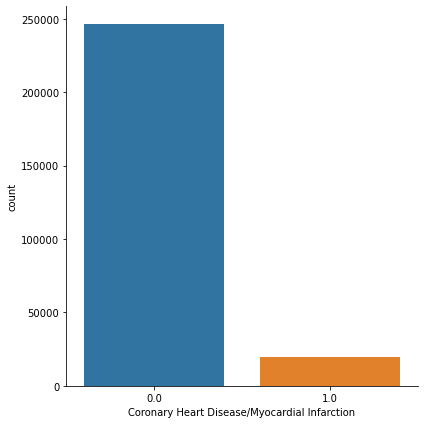

In [4]:
#Visualizing the imbalanced dataset
sb.catplot(x = 'Coronary Heart Disease/Myocardial Infarction', data = train_data, kind = "count", height = 6)

In [5]:
# Setting up labels for resampling techniques
labels = train_data['Coronary Heart Disease/Myocardial Infarction'] == 1
labels = [1 if x==True else 0 for x in labels]
labels.count(1)

19286

## Resampling

### TomekLinks (Under-sampling)

In [6]:
tl = TomekLinks()

In [7]:
tomek_data, tomek_labels = tl.fit_resample(train_data, labels)

In [8]:
tomek_data['Coronary Heart Disease/Myocardial Infarction'].value_counts()

0.0    242237
1.0     19286
Name: Coronary Heart Disease/Myocardial Infarction, dtype: int64

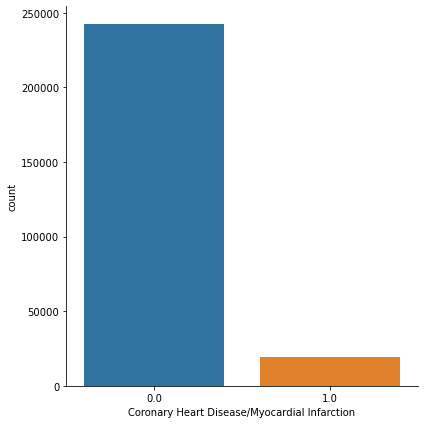

In [9]:
sb.catplot(x = 'Coronary Heart Disease/Myocardial Infarction', data = tomek_data, kind = "count", height = 6)

## SMOTEENN (Under-sampling + Over-sampling)

In [10]:
sme = SMOTEENN(random_state=516)

In [12]:
smoteenn_data, smoteenn_label = sme.fit_resample(train_data, labels)

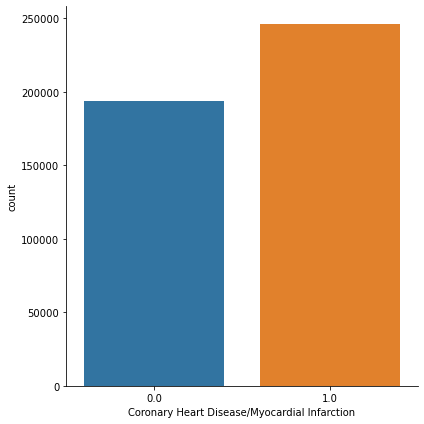

In [13]:
sb.catplot(x = 'Coronary Heart Disease/Myocardial Infarction', data = smoteenn_data, kind = "count", height = 6)

## SMOTETomek (Under-sampling + Over-sampling)

In [14]:
smt = SMOTETomek(random_state=516)

In [15]:
smotetomek_data, smotetomek_label = smt.fit_resample(train_data, labels)

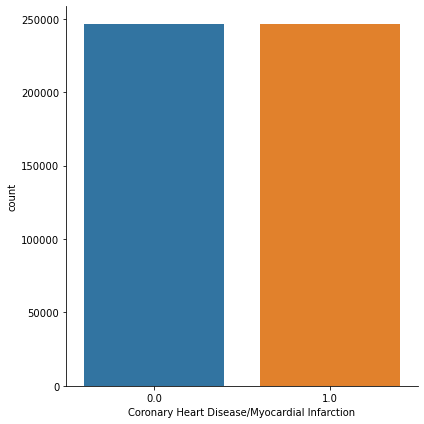

In [16]:
sb.catplot(x = 'Coronary Heart Disease/Myocardial Infarction', data = smotetomek_data, kind = "count", height = 6)

## Exporting the resampled and test dataset

In [17]:
smotetomek_data.to_csv("Data/smotetomek_data.csv")

In [18]:
smoteenn_data.to_csv("Data/smoteenn_data.csv")

In [19]:
tomek_data.to_csv("Data/tomek_data.csv")

In [20]:
test_data.to_csv("Data/test.csv")

In [21]:
val_data.to_csv("Data/val.csv")

In [22]:
selected_data   = pd.read_csv("Data/selected_data.csv")
tomek_data      = pd.read_csv("Data/tomek_data.csv")
smoteenn_data   = pd.read_csv("Data/SMOTEENN_data.csv")
smotetomek_data = pd.read_csv("Data/SMOTETOMEK_data.csv")

## Comparing the datasets

In [23]:
print("Ratio of Coronary Heart Disease/Myocardial Infarction values")
print("Original dataset:\t",selected_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[0],":"
      ,selected_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[1])
print("TomekLinks dataset:\t",tomek_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[0],":"
      ,tomek_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[1])
print("SMOTEENN dataset:\t",smoteenn_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[0],":"
      ,smoteenn_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[1])
print("SMOTETOMEK dataset:\t",smotetomek_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[0],":"
      ,smotetomek_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[1])

Ratio of Coronary Heart Disease/Myocardial Infarction values
Original dataset:	 384638 : 30161
TomekLinks dataset:	 242237 : 19286
SMOTEENN dataset:	 194028 : 245746
SMOTETOMEK dataset:	 246143 : 246143


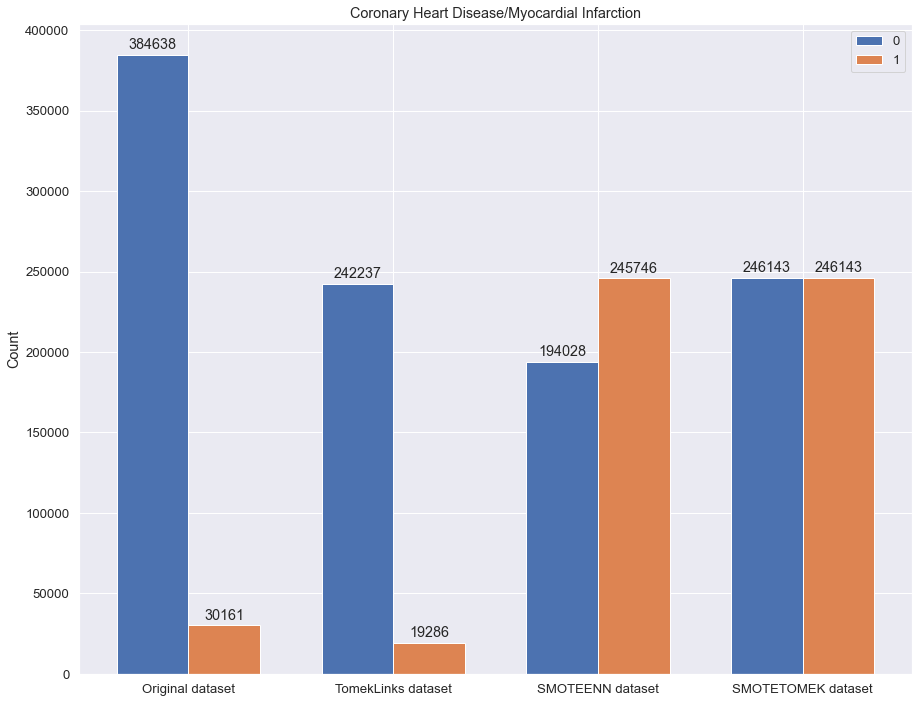

In [31]:
labels = ['Original dataset','TomekLinks dataset', 'SMOTEENN dataset', 'SMOTETOMEK dataset']
zeros  = [selected_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[0],
          tomek_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[0]   ,
          smoteenn_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[0],
          smotetomek_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[0]]
ones   = [selected_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[1],
          tomek_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[1]   ,
          smoteenn_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[1],
          smotetomek_data["Coronary Heart Disease/Myocardial Infarction"].value_counts()[1]]

x = np.arange(len(labels))
width = 0.35

sb.set_theme(style="darkgrid")
sb.set(font_scale=1.2)
fig, axes = plt.subplots(figsize = (13,10))
boxes1 = axes.bar(x - width/2, zeros, width, label='0')
boxes2 = axes.bar(x + width/2, ones, width, label='1')

axes.set_ylabel('Count')
axes.set_title('Coronary Heart Disease/Myocardial Infarction')
axes.set_xticks(x)
axes.set_xticklabels(labels)
axes.legend()

axes.bar_label(boxes1, padding=3)
axes.bar_label(boxes2, padding=3)

plt.tight_layout()

plt.show()

### From the graphs, we can see that the resampled datasets are more balanced in terms of the ratio between 0 and 1 values of the variable 'Coronary Heart Disease/Myocardial Infarction'